In [67]:
import pandas as pd
from datetime import datetime
%matplotlib inline
%load_ext watermark
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sb
from IPython.display import display
import sklearn as sk
import sklearn.neural_network as sknn


treat_time = lambda x:datetime.strptime(x,"%m/%d/%y")
to_npdatetime = lambda x: pd.to_datetime(x,"%m/%d/%y")

covid_data = pd.read_csv('covid_19_clean_complete.csv', na_values=['NaN'])
covid_data['Date'] = covid_data['Date'].map(treat_time)
covid_data = covid_data.sort_values(['Date','Country/Region'],ascending=[True, False])

print(covid_data.loc[covid_data['Date'] == datetime(2020,1,22)].count())


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Province/State     80
Country/Region    264
Lat               264
Long              264
Date              264
Confirmed         264
Deaths            264
Recovered         264
dtype: int64


,Date,Country/Region,Province/State,C/D/R,Cases
0,2020-01-22,Spain,NaN,Confirmed,0
1,2020-01-22,Portugal,NaN,Confirmed,0
2,2020-01-23,Spain,NaN,Confirmed,0
3,2020-01-23,Portugal,NaN,Confirmed,0
4,2020-01-24,Spain,NaN,Confirmed,0
...,...,...,...,...,...
619,2020-05-02,Portugal,NaN,Recovered,1671
620,2020-05-03,Spain,NaN,Recovered,118902
621,2020-05-03,Portugal,NaN,Recovered,1689
622,2020-05-04,Spain,NaN,Recovered,121343


,count,mean,std,min,25%,50%,75%,max
Lat,208.0,39.699950,0.300774,39.3999,39.3999,39.69995,40.00,40.0
Long,208.0,-6.112250,2.117346,-8.2245,-8.2245,-6.11225,-4.00,-4.0
Confirmed,208.0,36184.019231,66689.001531,0.0000,1.0000,729.00000,24100.75,218011.0
Deaths,208.0,3490.500000,7255.202359,0.0000,0.0000,8.00000,954.25,25428.0
Recovered,208.0,12813.451923,29792.401096,0.0000,0.0000,5.00000,1409.25,121343.0


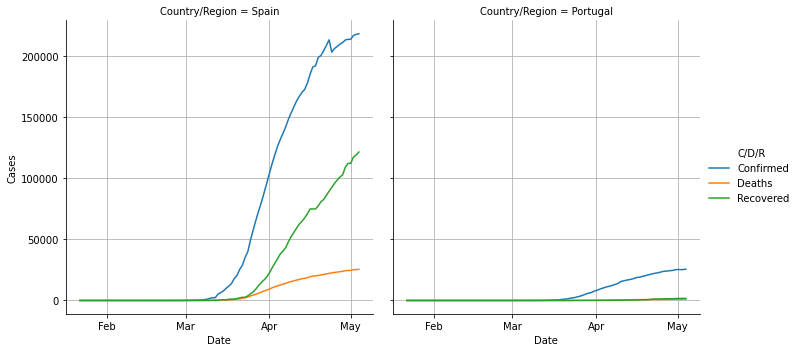

In [93]:

portugal_data = covid_data.loc[(covid_data['Country/Region'] == 'Portugal') | (covid_data['Country/Region'] == 'Spain')]
things = ['Confirmed','Deaths','Recovered']
dd = portugal_data.melt(['Date','Country/Region','Province/State'],var_name='C/D/R', value_name='Cases',value_vars=things)


chart = sb.relplot(x='Date',y='Cases',hue='C/D/R',col='Country/Region',data=dd,kind='line')

axs = chart.axes

days = mdates.MonthLocator(interval=1)
months = mdates.MonthLocator()  # every month
days_fmt = mdates.DateFormatter('%b')

for ax in axs[0]:
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.xaxis.set_minor_locator(days)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.grid(True)


include = ['datetime64', 'float', 'int'] 
dd.describe(include = include).transpose()


display(dd)
portugal_data.describe().transpose()



In [69]:
display(covid_data.loc[ (~covid_data['Province/State'].isnull())]['Country/Region'].unique())

array(['United Kingdom', 'Netherlands', 'France', 'Denmark', 'China',
       'Canada', 'Australia'], dtype=object)

In [98]:
def parseForNN(df):
    return df[['Lat','Long','Date']], df[['Confirmed','Deaths','Recovered']]

def daysSinceJan(d):
    return d.toordinal() - datetime(2020,1,1).toordinal()

X,Y = parseForNN(portugal_data)
X['Date'] = X['Date'].map(daysSinceJan)
X = X.values
Y = Y.values

nn = sknn.MLPRegressor(
    hidden_layer_sizes=(10,20,1000,20,10),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    max_iter=1000,
    verbose=True
    )

nn.fit(X,Y)



Iteration 1, loss = 1141230795.55003238
Iteration 2, loss = 1141153659.51001716
Iteration 3, loss = 1141094680.67734504
Iteration 4, loss = 1141026792.18557930
Iteration 5, loss = 1140954190.63436675
Iteration 6, loss = 1140868770.25431967
Iteration 7, loss = 1140774367.69026732
Iteration 8, loss = 1140661359.26586318
Iteration 9, loss = 1140527504.99639797
Iteration 10, loss = 1140373770.38519859
Iteration 11, loss = 1140190605.15008998
Iteration 12, loss = 1139977896.96559930
Iteration 13, loss = 1139733138.75433636
Iteration 14, loss = 1139445017.24063516
Iteration 15, loss = 1139114108.19073701
Iteration 16, loss = 1138727859.25859785
Iteration 17, loss = 1138275338.03160000
Iteration 18, loss = 1137742624.35061526
Iteration 19, loss = 1137154924.88666177
Iteration 20, loss = 1136458578.48929429
Iteration 21, loss = 1135658003.34055591
Iteration 22, loss = 1134724674.91136909
Iteration 23, loss = 1133615362.87834430
Iteration 24, loss = 1132351563.51471019
Iteration 25, loss = 1130

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 20, 1000, 20, 10),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=1000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=True, warm_start=False)

In [99]:
display(covid_data.loc[(covid_data['Country/Region'] == 'Portugal') & (covid_data['Date'] == datetime(2020,4,2))])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
18928,NaN,Portugal,39.3999,-8.2245,2020-04-02,9034,209,68


In [103]:
nn.predict([[39.3999,-8.2245,daysSinceJan(datetime(2020,5,8)) ]])

array([[120816.10921357,  12352.95487013,  46811.69117446]])